In [1]:
!wget -nc -P ../data/ "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/067/435/original/booking.csv"

File ‘../data/booking.csv’ already there; not retrieving.



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r'../data/booking.csv')
df_original= df.copy()

Target= 'booking_status'
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [4]:
df.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
x= df_original.drop(columns= Target, axis= 1)
y= df_original[Target]

df_original[Target].value_counts()

booking_status
0    25596
1    16504
Name: count, dtype: int64

```
Analyzing Restaurant Booking Patterns
Context:
Welcome to the Scaler Hospitality Analytics team! We're diving into the Restaurant Booking dataset to enhance our booking management system. Your insights will help us optimize operations and improve customer experiences.

Task:
Your initial task is to conduct an exploratory data analysis to uncover insights about unusual booking patterns, specifically, bookings where neither adults nor children are included.

Instructions:
Data Inspection: Examine the dataset for entries that indicate bookings with zero adults and zero children.
Count Such Bookings: Calculate the number of such instances to understand the prevalence of this anomaly.
Question:
Based on the dataset provided, how many bookings are recorded where both the number of adults and the number of children are zero?

Options:
A) 147 bookings

B) 16 bookings

C) 2 bookings

D) 0 bookings
```

In [6]:
# df_original['no_of_adults'].value_counts(), df_original['no_of_children'].value_counts() 
booking_counts= df_original[(df_original['no_of_adults']==0) & (df_original['no_of_children']==0)].shape[0]

print("number of bookings with zero adults and zero children ", booking_counts)

number of bookings with zero adults and zero children  16


```Booking Status Distribution by Month
Context:
Understanding seasonal trends in booking cancellations can help the Scaler Hospitality Analytics team develop targeted strategies to minimize losses and improve customer retention. You are tasked with visualizing how booking statuses vary by month.

Task:
Create a visual representation to analyze the distribution of booking cancellations across different months using the 'arrival_month' and 'booking_status' columns in the dataset.

Instructions:
Group and Count Data: Use the dataset to group entries by 'arrival_month' and 'booking_status'. Count the occurrences of each booking status (canceled or not canceled) for every month.
Visualize Data: Generate a bar chart that displays the counts of canceled and not canceled bookings for each month. This will help in visually comparing the booking trends over the year.
Analyze Trends: Examine the bar chart to determine which month has the highest number of cancellations and which has the lowest.
Question:
After analyzing the bar chart representing the booking status count for each month, identify the months with the highest and lowest number of booking cancellations.

Options:
A) Highest: August, Lowest: January

B) Highest: December, Lowest: February

C) Highest: July, Lowest: November

D) Highest: May, Lowest: March 
```

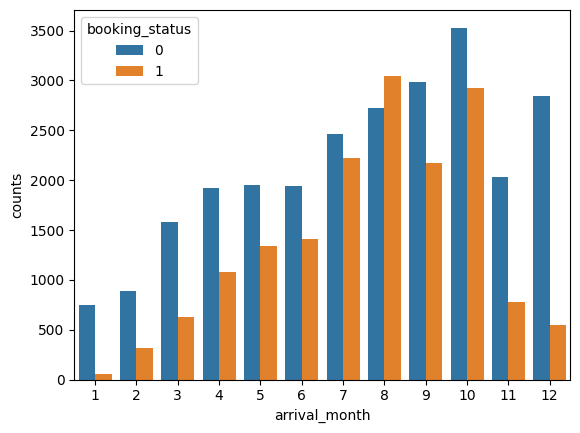

In [14]:
booking_status_count= df_original.groupby(['arrival_month','booking_status']).size().reset_index(name= 'counts')
sns.barplot(data = booking_status_count, x='arrival_month', y ='counts', hue= 'booking_status')
plt.show()